<a href="https://colab.research.google.com/github/bethdfuller/Capstone/blob/main/BFC964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link Data, Import Libraries and Load Data

Import: 

*   Pandas 
*   Matplotlib


Link 

*   Aviation Data set from Kaggle, stored in Github



In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

url = 'https://raw.githubusercontent.com/bethdfuller/Capstone/main/AviationData.csv'



*   Read CSV File
*   Print Head of Data



In [41]:
dfAviation = pd.read_csv("AviationData.csv", encoding = 'ISO-8859-1',low_memory=False)

In [42]:
dfAviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Data Clean




*   Separate Location into City & State
*   Filter Alaska Data



In [43]:
dfAviation['City'] = dfAviation['Location'].str.split(',').str[0]
dfAviation['State'] = dfAviation['Location'].str.split(',').str[1]

In [51]:
dfAviation['Event.Date'] = pd.to_datetime(dfAviation['Event.Date'])
dfAviation['Year'] = dfAviation['Event.Date'].apply(lambda time: time.year)
dfAviation['Month'] = dfAviation['Event.Date'].apply(lambda time: time.month)



*   Filter United States
*   Filter Accidents
*   List item
*   List item


In [52]:
dfAviation = dfAviation[dfAviation['Country']=='United States']


In [53]:
dfAviation = dfAviation[dfAviation['Investigation.Type']=='Accident']

Filter States for Alaska Data

In [54]:
akAviation = dfAviation[dfAviation['State'].str.contains('AK', na = False)]
akAviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Year,Month
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983,SKWENTA,AK,1982,1
44,20020917X01651,Accident,ANC82FA012,1982-01-05,"BETHEL, AK",United States,NaN,NaN,BET,BETHEL,...,0.0,0.0,VMC,Takeoff,Probable Cause,05-01-1983,BETHEL,AK,1982,1
74,20020917X01623,Accident,ANC82DA013,1982-01-10,"QUINHAGAK, AK",United States,NaN,NaN,NaN,NaN,...,3.0,0.0,VMC,Cruise,Probable Cause,10-01-1983,QUINHAGAK,AK,1982,1
95,20020917X01625,Accident,ANC82DA015,1982-01-15,"NEAR NUIQSUT, AK",United States,NaN,NaN,NaN,NaN,...,0.0,4.0,VMC,Landing,Probable Cause,15-01-1983,NEAR NUIQSUT,AK,1982,1
105,20020917X01624,Accident,ANC82DA014,1982-01-17,"ANCHORAGE, AK",United States,NaN,NaN,MRI,MERRILL FIELD,...,1.0,1.0,VMC,Takeoff,Probable Cause,17-01-1983,ANCHORAGE,AK,1982,1


In [55]:
akAviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5449 entries, 17 to 87232
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                5449 non-null   object        
 1   Investigation.Type      5449 non-null   object        
 2   Accident.Number         5449 non-null   object        
 3   Event.Date              5449 non-null   datetime64[ns]
 4   Location                5449 non-null   object        
 5   Country                 5449 non-null   object        
 6   Latitude                2091 non-null   object        
 7   Longitude               2091 non-null   object        
 8   Airport.Code            2026 non-null   object        
 9   Airport.Name            2324 non-null   object        
 10  Injury.Severity         5448 non-null   object        
 11  Aircraft.damage         5420 non-null   object        
 12  Aircraft.Category       1652 non-null   object

Drop Irrelevant Columns: Event ID, Accident Number, Country, Airport Name, Registration Number, Schedule, Report Status, Publication Date



Clean Data

In [56]:
akAviation.drop(['Event.Id', 'Accident.Number', 'Location', 'Airport.Name', 'Registration.Number',
                 'Schedule', 'Report.Status', 'Publication.Date'], axis=1)

,Investigation.Type,Event.Date,Country,Latitude,Longitude,Airport.Code,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,City,State,Year,Month
17,Accident,1982-01-02,United States,NaN,NaN,NaN,Fatal(3),Destroyed,Airplane,Cessna,...,3.0,0.0,0.0,0.0,VMC,Unknown,SKWENTA,AK,1982,1
44,Accident,1982-01-05,United States,NaN,NaN,BET,Non-Fatal,Substantial,Airplane,Cessna,...,0.0,2.0,0.0,0.0,VMC,Takeoff,BETHEL,AK,1982,1
74,Accident,1982-01-10,United States,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,Cessna,...,0.0,0.0,3.0,0.0,VMC,Cruise,QUINHAGAK,AK,1982,1
95,Accident,1982-01-15,United States,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,De Havilland,...,0.0,0.0,0.0,4.0,VMC,Landing,NEAR NUIQSUT,AK,1982,1
105,Accident,1982-01-17,United States,NaN,NaN,MRI,Non-Fatal,Destroyed,Airplane,Cessna,...,0.0,0.0,1.0,1.0,VMC,Takeoff,ANCHORAGE,AK,1982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87150,Accident,2021-11-09,United States,065181N,0014380W,L20,Non-Fatal,Substantial,Airplane,CUB CRAFTERS INC,...,0.0,0.0,0.0,1.0,VMC,NaN,Yukon Charlie River,AK,2021,11
87200,Accident,2021-11-21,United States,604645N,1615012W,BET,Non-Fatal,Substantial,Airplane,CESSNA,...,0.0,0.0,0.0,6.0,VMC,NaN,Bethel,AK,2021,11
87216,Accident,2021-11-26,United States,NaN,NaN,NaN,Non-Fatal,NaN,NaN,PIPER,...,0.0,1.0,0.0,0.0,NaN,NaN,Palmer,AK,2021,11
87224,Accident,2021-11-29,United States,NaN,NaN,NaN,NaN,NaN,NaN,FOUND ACFT CANADA INC,...,0.0,0.0,0.0,0.0,NaN,NaN,Nikiski,AK,2021,11


# Analysis

Aviation Accidents in Alaska by Year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


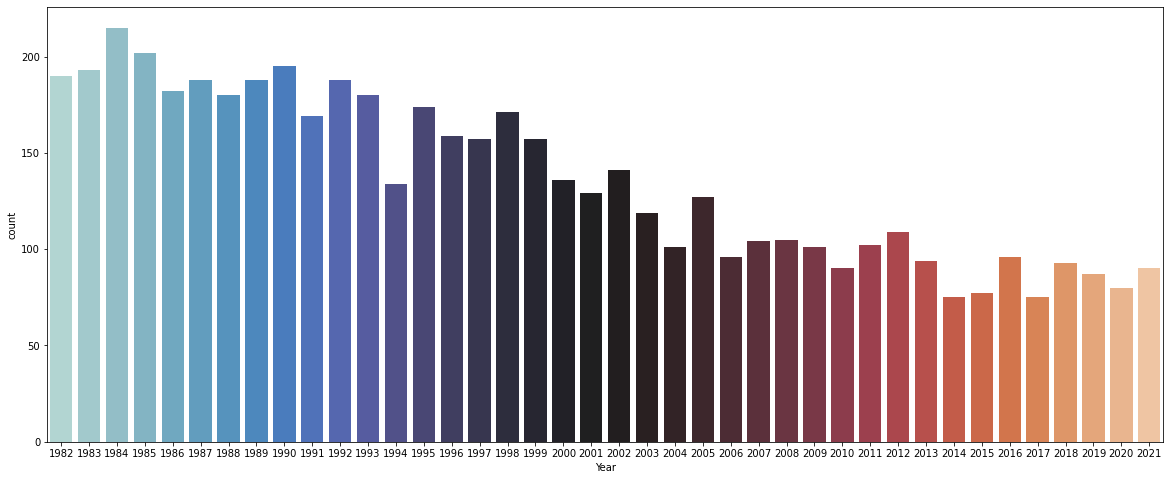

In [59]:
plt.figure(figsize=(20,8))
sns.countplot(akAviation['Year'], palette = 'icefire')

Aviation Accidents in Alaska by Month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


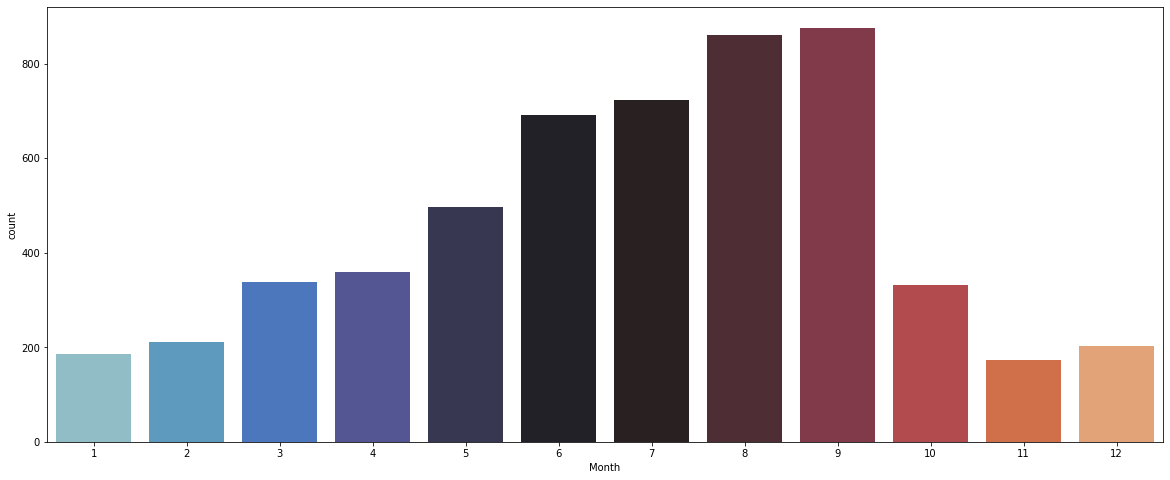

In [60]:
plt.figure(figsize = (20,8))
sns.countplot(akAviation['Month'], palette = 'icefire')